In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Strategic Thinking/Jan_2020_ontime.csv")

# EDA

In [ ]:
df.head(15)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN
5,1,3,EV,20366,EV,N605UX,4408,13871,1387102,OMA,...,IAH,555.0,0.0,0600-0659,838.0,0.0,0.0,0.0,781.0,NaN
6,1,3,EV,20366,EV,N14991,4410,12266,1226603,IAH,...,SHV,1610.0,0.0,1600-1659,1718.0,0.0,0.0,0.0,192.0,NaN
7,1,3,EV,20366,EV,N15986,4411,12266,1226603,IAH,...,HRL,1415.0,0.0,1400-1459,1531.0,0.0,0.0,0.0,295.0,NaN
8,1,3,EV,20366,EV,N603UX,4412,13930,1393007,ORD,...,ABQ,1938.0,0.0,1900-1959,2204.0,0.0,0.0,0.0,1118.0,NaN
9,1,3,EV,20366,EV,N13975,4414,11618,1161802,EWR,...,MSN,1011.0,0.0,1000-1059,1139.0,0.0,0.0,0.0,799.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           607346 non-null  int64  
 1   DAY_OF_WEEK            607346 non-null  int64  
 2   OP_UNIQUE_CARRIER      607346 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  607346 non-null  int64  
 4   OP_CARRIER             607346 non-null  object 
 5   TAIL_NUM               606648 non-null  object 
 6   OP_CARRIER_FL_NUM      607346 non-null  int64  
 7   ORIGIN_AIRPORT_ID      607346 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  607346 non-null  int64  
 9   ORIGIN                 607346 non-null  object 
 10  DEST_AIRPORT_ID        607346 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    607346 non-null  int64  
 12  DEST                   607346 non-null  object 
 13  DEP_TIME               600682 non-null  float64
 14  DEP_DEL15              600647 non-nu

In [ ]:
df.isna().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                    698
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                   6664
DEP_DEL15                  6699
DEP_TIME_BLK                  0
ARR_TIME                   7075
ARR_DEL15                  8078
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              607346
dtype: int64

In [ ]:
df.isnull().sum().sum()

636560

we can see that we have 636560 from the dataset in total.

We will use duplicated()

It is one of the important parts of Data analysis is analyzing Duplicate Values and removing them. Pandas duplicated() method helps in analyzing duplicate values only. It returns a boolean series which is True only for Unique elements.

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 22)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           607346 non-null  int64  
 1   DAY_OF_WEEK            607346 non-null  int64  
 2   OP_UNIQUE_CARRIER      607346 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  607346 non-null  int64  
 4   OP_CARRIER             607346 non-null  object 
 5   TAIL_NUM               606648 non-null  object 
 6   OP_CARRIER_FL_NUM      607346 non-null  int64  
 7   ORIGIN_AIRPORT_ID      607346 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  607346 non-null  int64  
 9   ORIGIN                 607346 non-null  object 
 10  DEST_AIRPORT_ID        607346 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    607346 non-null  int64  
 12  DEST                   607346 non-null  object 
 13  DEP_TIME               600682 non-null  float64
 14  DEP_DEL15              600647 non-nu

In [ ]:
import missingno as msno

<Axes: >

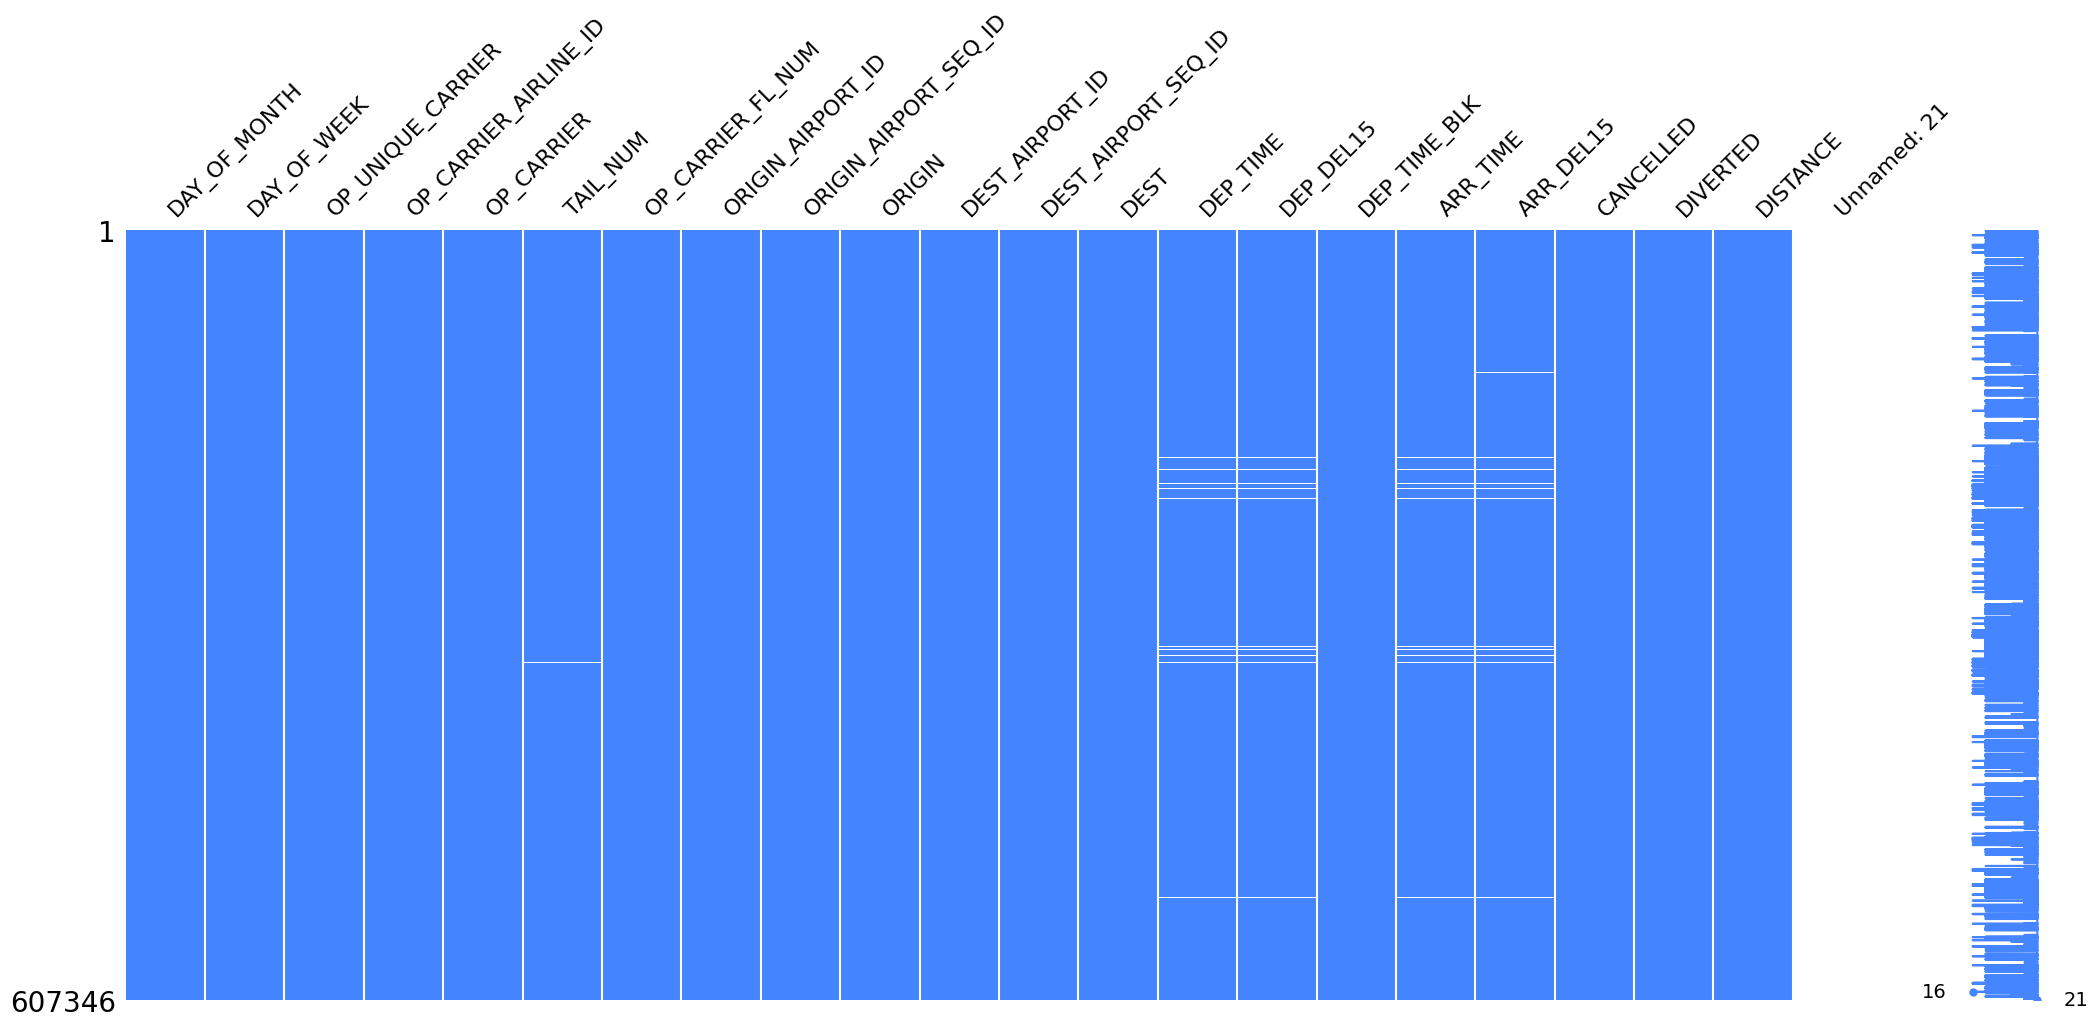

In [ ]:
msno.matrix(df, color = (0.27, 0.52, 1.0))

In [ ]:
df.isna().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                    698
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                   6664
DEP_DEL15                  6699
DEP_TIME_BLK                  0
ARR_TIME                   7075
ARR_DEL15                  8078
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              607346
dtype: int64

Colum "unnamed" was dropped. All missing values were dropped,TAIL_NUM is an alphanumeric code used to identify a specific airplane, therefore; filling with Mean, Median,Mode is not an option,. DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15, they are all variales that have unique values, trying to create data to fill these missing values could cause a totally wrong prediction on the flights delay.Since we actually need to know the time the plane departured to at least have an idea of the time the plane will arrive. but in this case we dont have that data. So is not good idea to replace it by using any imputing method. Therefore we have removed them.

Dropping unuseful column to decrease dimensionality.
All the variables dropped below wont be needed for our analysis and machine learning models, beacause they dont provide significant information to be analysed, most of them are just Identifiers for the flihght, the plane or the airports. But this iformation does not help to predict if a fight will be delayed or not. therefore they are being dropped.

WE wil drop straight columns 'Unnamed: 21','CANCELLED', 'DIVERTED'

In [ ]:
to_drop = ['Unnamed: 21','CANCELLED', 'DIVERTED']

In [ ]:
df.drop(to_drop, axis=1, inplace=True)

In [ ]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,174.0
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,585.0
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,631.0
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,253.0
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,1157.0


We have the datset without drpoped columns.


# Missing values

We will cheack if the dataset has any unexpected values and replace them with NaN. It will be easier work with the missing values.

WE will be working wuth the columns separatly as they carry differnt representation of values. The best way to deal woth that to replcae missing values by each column.

In [ ]:
# replace "na" and other expectable marks to NaN
df.replace(["n.a.","?","NA","n/a", "na", "--"], np.nan, inplace = True)
df.head(-5)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,174.0
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,585.0
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,631.0
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,253.0
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,1157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607336,31,5,9E,20363,9E,N686BR,4806,14100,1410005,PHL,14492,1449202,RDU,557.0,0.0,0600-0659,733.0,0.0,337.0
607337,31,5,9E,20363,9E,N306PQ,4807,13487,1348702,MSP,11042,1104205,CLE,826.0,0.0,0800-0859,1124.0,0.0,622.0
607338,31,5,9E,20363,9E,N8936A,4809,13422,1342202,MOB,10397,1039707,ATL,550.0,0.0,0001-0559,818.0,0.0,302.0
607339,31,5,9E,20363,9E,N329PQ,4810,12953,1295304,LGA,11986,1198603,GRR,2052.0,0.0,2000-2059,2251.0,0.0,618.0


### TAIL NUM
I will replace the missing values in "TAIL_NUM" by ffill method as it is variable represent unique airpline number other methods would be incoorect.

In [ ]:
df["TAIL_NUM"] = df["TAIL_NUM"].fillna(method='ffill')

In [ ]:
df.isnull().sum()

DAY_OF_MONTH                0
DAY_OF_WEEK                 0
OP_UNIQUE_CARRIER           0
OP_CARRIER_AIRLINE_ID       0
OP_CARRIER                  0
TAIL_NUM                    0
OP_CARRIER_FL_NUM           0
ORIGIN_AIRPORT_ID           0
ORIGIN_AIRPORT_SEQ_ID       0
ORIGIN                      0
DEST_AIRPORT_ID             0
DEST_AIRPORT_SEQ_ID         0
DEST                        0
DEP_TIME                 6664
DEP_DEL15                6699
DEP_TIME_BLK                0
ARR_TIME                 7075
ARR_DEL15                8078
DISTANCE                    0
dtype: int64

### DEP_DEL15 and ARR_DEL15

We will rplace the features with 0. This method is the most sitable as we can not have mean and median, and it will misstake to fill them with ffill function.



In [ ]:
df['DEP_DEL15'] = df['DEP_DEL15'].replace(np.NaN,0)
df['DEP_DEL15'].isnull().sum()


0

In [ ]:
df['ARR_DEL15'] = df['ARR_DEL15'].replace(np.NaN,0)
df['ARR_DEL15'].isnull().sum()

0

In [ ]:
df.isnull().sum()

DAY_OF_MONTH                0
DAY_OF_WEEK                 0
OP_UNIQUE_CARRIER           0
OP_CARRIER_AIRLINE_ID       0
OP_CARRIER                  0
TAIL_NUM                    0
OP_CARRIER_FL_NUM           0
ORIGIN_AIRPORT_ID           0
ORIGIN_AIRPORT_SEQ_ID       0
ORIGIN                      0
DEST_AIRPORT_ID             0
DEST_AIRPORT_SEQ_ID         0
DEST                        0
DEP_TIME                 6664
DEP_DEL15                   0
DEP_TIME_BLK                0
ARR_TIME                 7075
ARR_DEL15                   0
DISTANCE                    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           607346 non-null  int64  
 1   DAY_OF_WEEK            607346 non-null  int64  
 2   OP_UNIQUE_CARRIER      607346 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  607346 non-null  int64  
 4   OP_CARRIER             607346 non-null  object 
 5   TAIL_NUM               607346 non-null  object 
 6   OP_CARRIER_FL_NUM      607346 non-null  int64  
 7   ORIGIN_AIRPORT_ID      607346 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  607346 non-null  int64  
 9   ORIGIN                 607346 non-null  object 
 10  DEST_AIRPORT_ID        607346 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    607346 non-null  int64  
 12  DEST                   607346 non-null  object 
 13  DEP_TIME               600682 non-null  float64
 14  DEP_DEL15              607346 non-nu

### DEP_TIME and ARR_TIME
This variable is countinues so would better if we replace it with mean or median. We will have a look on the distribution of the variable to find the best option.

In [ ]:
df["DEP_TIME"].describe()

count    600682.000000
mean       1331.512559
std         497.095168
min           1.000000
25%         919.000000
50%        1326.000000
75%        1739.000000
max        2400.000000
Name: DEP_TIME, dtype: float64

In [ ]:
df["ARR_TIME"].describe()

count    600271.000000
mean       1477.968924
std         525.543294
min           1.000000
25%        1058.000000
50%        1513.000000
75%        1918.000000
max        2400.000000
Name: ARR_TIME, dtype: float64

We can see the features are very close to the normal distribution. We will use mean to replace the missing values.


In [ ]:
dep_mean =  df["DEP_TIME"].mean()
dep_mean

1331.512559057871

In [ ]:
arr_mean = df["ARR_TIME"].mean()
arr_mean

1477.9689240359771

We will use Simple Imputer to impute missing values with median values of the columns

- SimpleImputer importd form sklearn
- nan from numpy as it could not recognise nan

In [ ]:
from numpy import nan
from sklearn.impute import SimpleImputer
mean_imp = SimpleImputer(missing_values=np.nan,strategy='mean')

#DEP_TIME
df['DEP_TIME'] = mean_imp.fit_transform(df[['DEP_TIME']])

#ARR_TIME
nan
df['ARR_TIME'] = mean_imp.fit_transform(df[['ARR_TIME']])

In [ ]:
df.isnull().sum()

DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_UNIQUE_CARRIER        0
OP_CARRIER_AIRLINE_ID    0
OP_CARRIER               0
TAIL_NUM                 0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN_AIRPORT_SEQ_ID    0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST_AIRPORT_SEQ_ID      0
DEST                     0
DEP_TIME                 0
DEP_DEL15                0
DEP_TIME_BLK             0
ARR_TIME                 0
ARR_DEL15                0
DISTANCE                 0
dtype: int64

<Axes: >

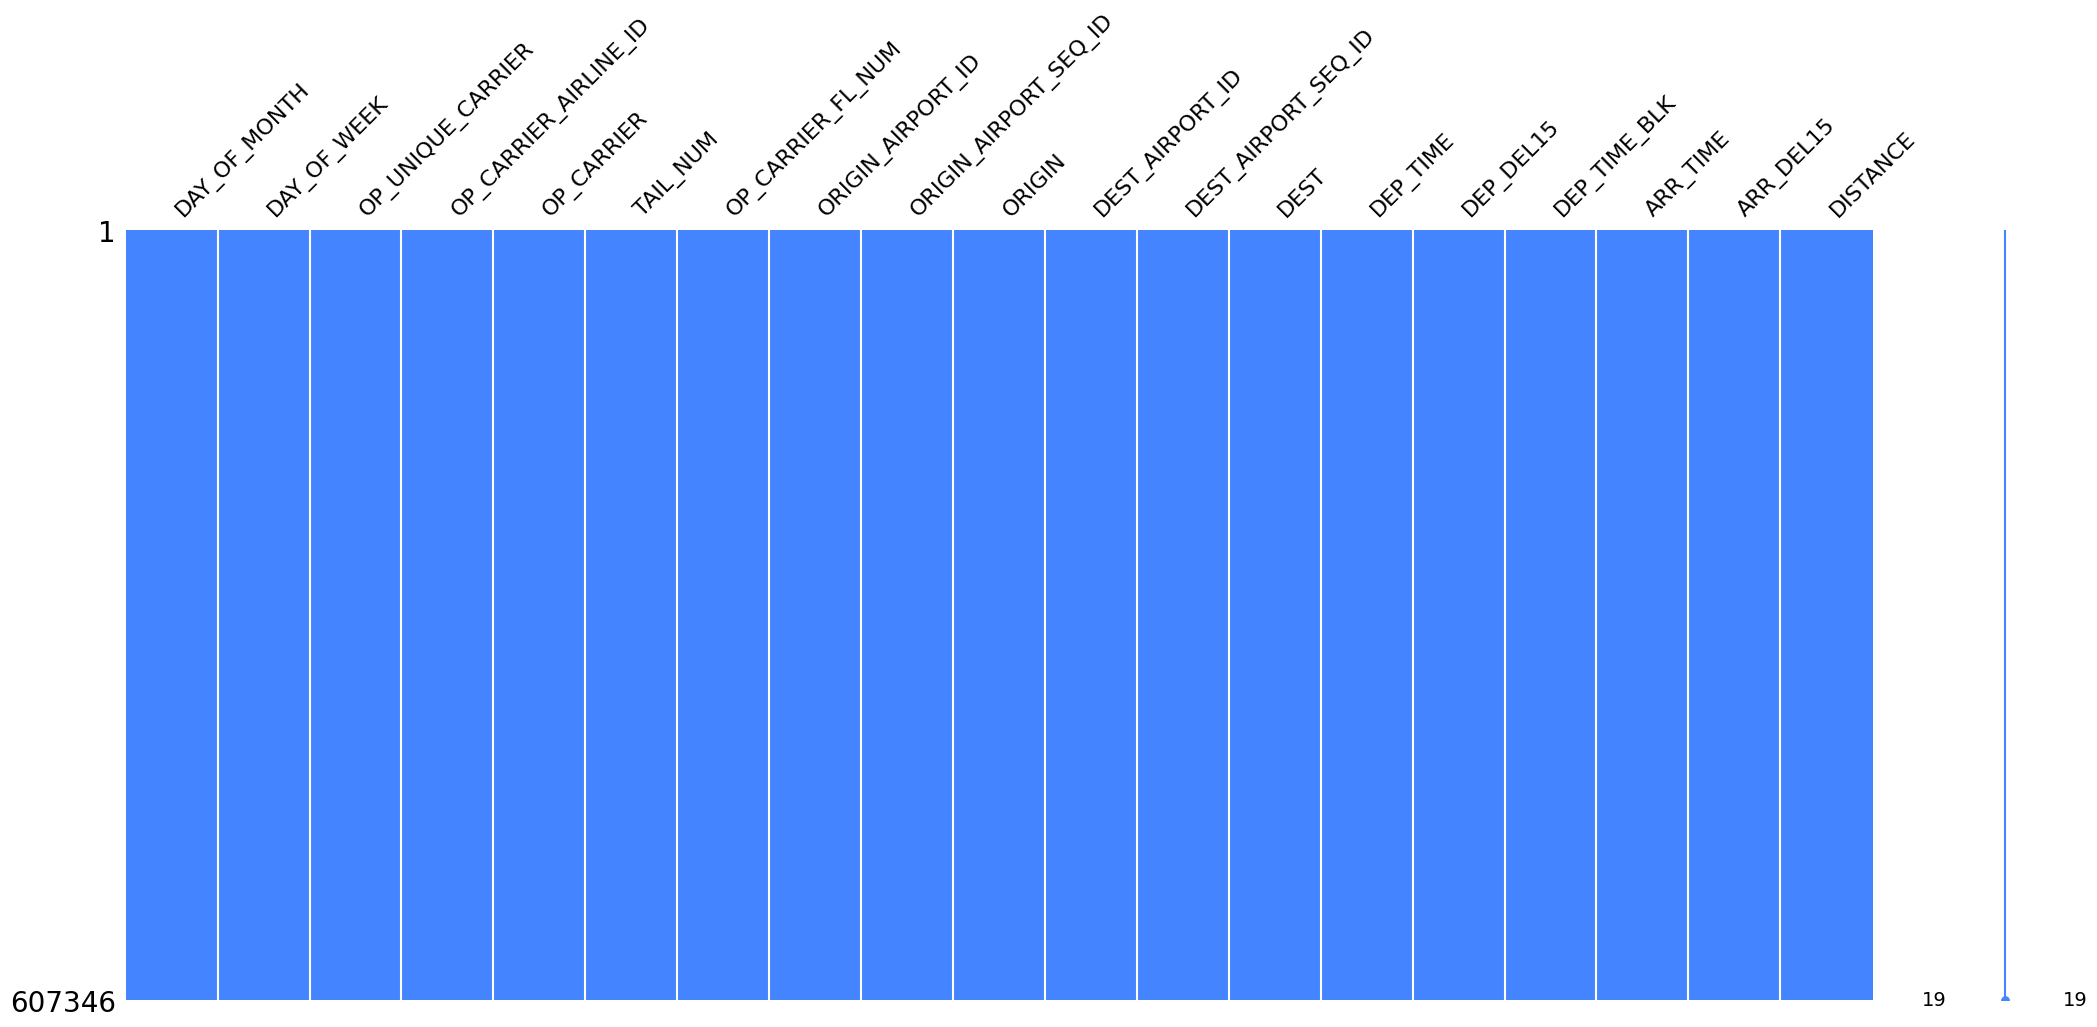

In [ ]:
msno.matrix(df, color=(0.27, 0.52, 1.0))

We have a dataset without missing values.

We will also have a look on the features in the dataset to see how balnace they are.

**Statistical representation**

In [ ]:
df.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,DISTANCE
count,607346.000000,607346.000000,607346.000000,607346.000000,607346.000000,6.073460e+05,607346.000000,6.073460e+05,607346.000000,607346.000000,607346.000000,607346.000000,607346.000000
mean,16.014354,3.955735,19994.137492,2622.365261,12657.389167,1.265743e+06,12657.196320,1.265724e+06,1331.512559,0.134823,1477.968924,0.135483,798.022341
std,8.990719,1.910205,375.754232,1822.545302,1524.407203,1.524405e+05,1524.279269,1.524277e+05,494.360496,0.341534,522.473283,0.342239,587.282639
min,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013506e+06,10135.000000,1.013506e+06,1.000000,0.000000,1.000000,0.000000,31.000000
25%,8.000000,2.000000,19790.000000,1070.000000,11292.000000,1.129202e+06,11292.000000,1.129202e+06,922.000000,0.000000,1101.000000,0.000000,369.000000
50%,16.000000,4.000000,19977.000000,2177.000000,12889.000000,1.288903e+06,12889.000000,1.288903e+06,1331.512559,0.000000,1506.000000,0.000000,641.000000
75%,24.000000,5.000000,20378.000000,4108.000000,14027.000000,1.402702e+06,14027.000000,1.402702e+06,1737.000000,0.000000,1916.000000,0.000000,1037.000000
max,31.000000,7.000000,20452.000000,6860.000000,16869.000000,1.686901e+06,16869.000000,1.686901e+06,2400.000000,1.000000,2400.000000,1.000000,5095.000000


From statistical representation we can say that most of the features have normal distribution. I will no take into consideration categorical features sush as id's as they do not make a sence in the analysis. DAY_OF_MONTH seems to be normaly distributed, however it is not the last point in the analysis, I will see it through the visualisation. DAY_OF_WEEK seems following normal distribution, probobly flight spreded during the week normaly. DEP_TIME also following normal distribution as mean and 50% qurtile are identical. ARR_TIME slightly skewed left(It might say that there is some flight delay in destination airport). DISTANCE also do not folow normal distribution. It is slightly skwed right.

**Visualisation**

We will build histograms for all feaures and will have a look on some of the closer in order to understand the data

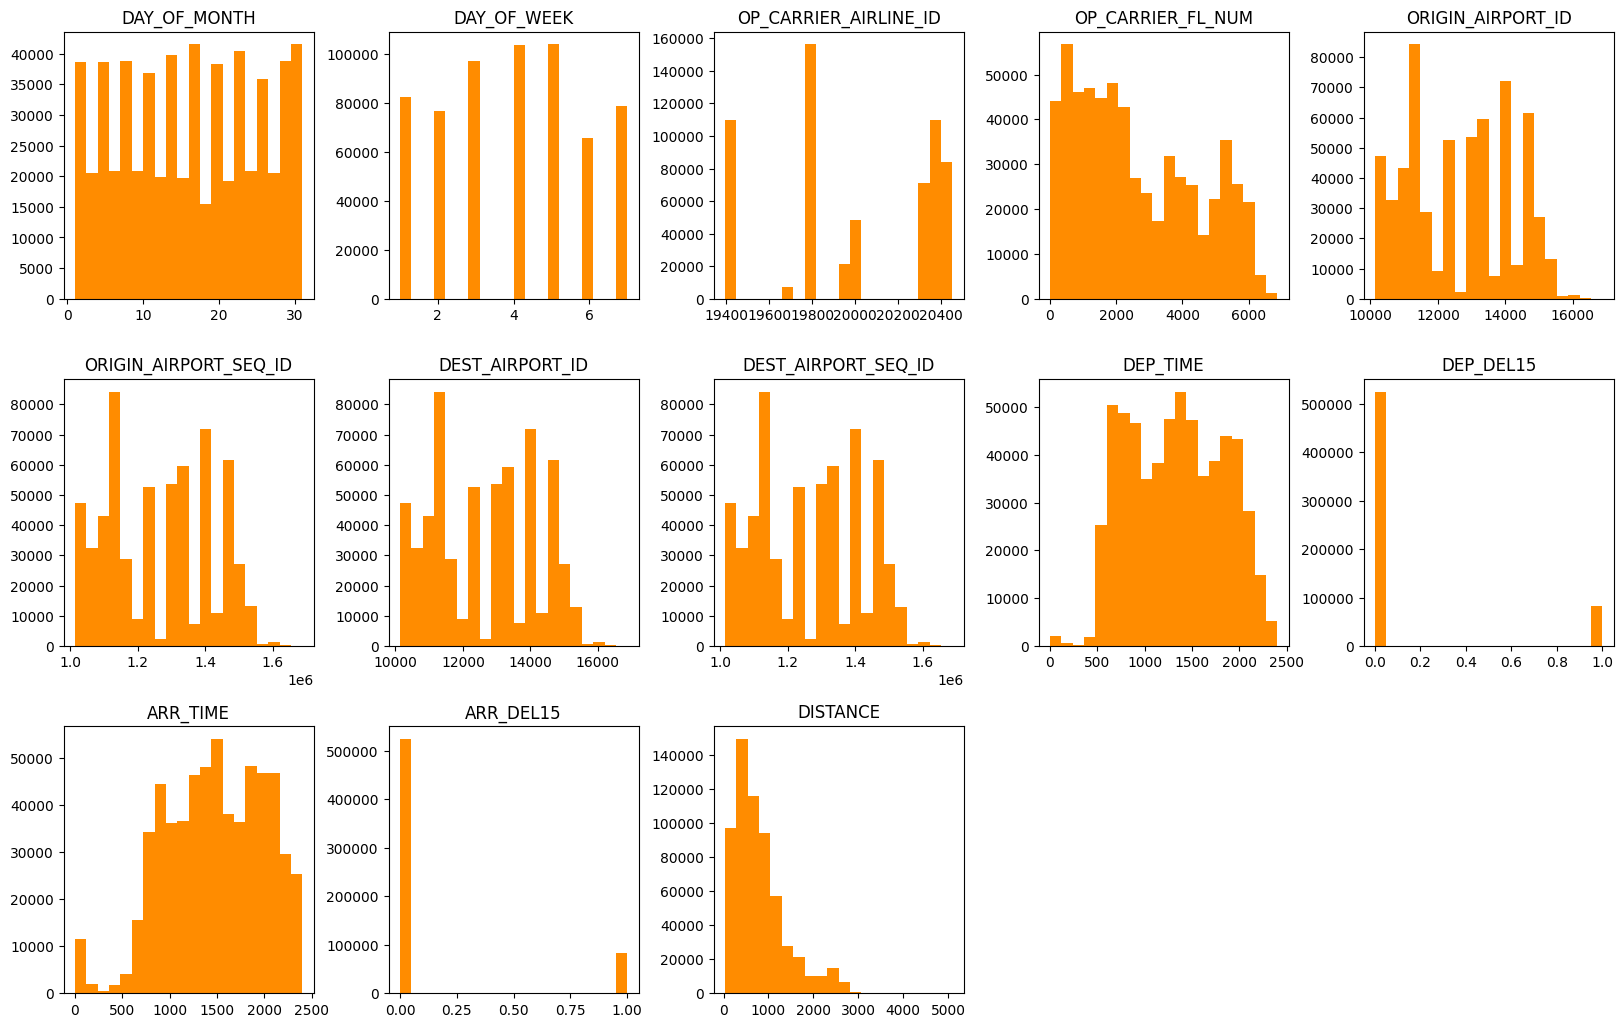

In [ ]:
df.hist(bins = 20 , layout = (4,5), figsize = (20,17)  ,column = df.columns, grid = False,
        color = "#ff8c00")
plt.show()

It is clear to see that many of the features do not follow the normal distribution. WE should normalize them before ML Model application. Otherwise the model will not perform wel and might geve incorrect result.


<Axes: >

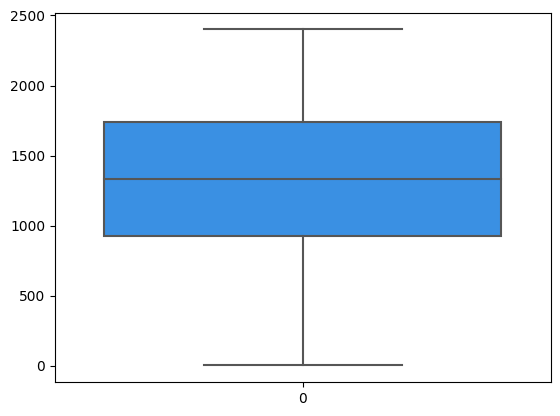

In [ ]:
sns.boxplot(df["DEP_TIME"], color = "#1e90ff")

<Axes: >

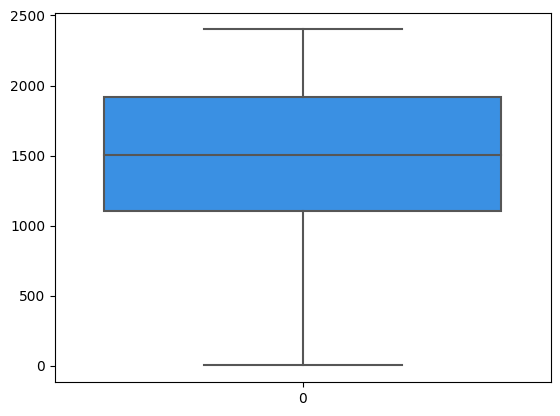

In [ ]:
sns.boxplot(df["ARR_TIME"], color = "#1e90ff")

<Axes: >

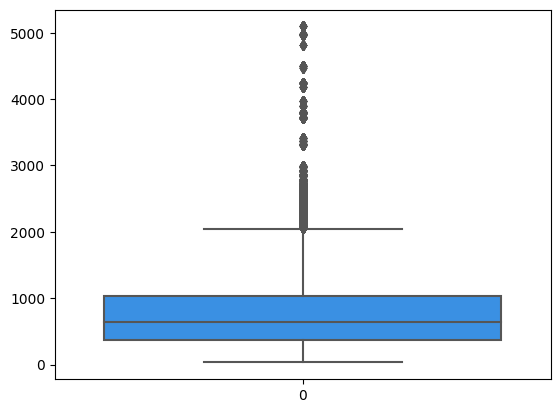

In [ ]:

sns.boxplot(df["DISTANCE"], color = "#1e90ff")

The feature "DISTANCE" seems to have outliers, however I would not say that they are outliers as they could be airports with the long distance from each other.

In [ ]:
df.columns.tolist()

['DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'OP_UNIQUE_CARRIER',
 'OP_CARRIER_AIRLINE_ID',
 'OP_CARRIER',
 'TAIL_NUM',
 'OP_CARRIER_FL_NUM',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN_AIRPORT_SEQ_ID',
 'ORIGIN',
 'DEST_AIRPORT_ID',
 'DEST_AIRPORT_SEQ_ID',
 'DEST',
 'DEP_TIME',
 'DEP_DEL15',
 'DEP_TIME_BLK',
 'ARR_TIME',
 'ARR_DEL15',
 'DISTANCE']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [ ]:
columns_to_encode = ['OP_CARRIER',
 'TAIL_NUM',
 'ORIGIN',
 'DEST']

### Encoding
We still categorical features in the dataframe. So we need to incode in order tot take them for ML model performance.
We will use lable encoding to encode "TAIL_NUM", "OP_UNIQUE_CARRIER", "OP_CARRIER", "ORIGIN" and "DEST"

In [ ]:
from sklearn.preprocessing import LabelEncoder
df= df.apply(LabelEncoder().fit_transform)

In [ ]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE
0,0,2,5,8,5,2118,4391,239,239,238,130,130,130,594,0,5,676,0,72
1,0,2,5,8,5,471,4395,335,335,334,238,238,237,618,0,5,735,0,438
2,0,2,5,8,5,208,4398,110,110,110,340,340,339,1120,0,13,1280,0,481
3,0,2,5,8,5,369,4399,50,50,50,156,156,156,1118,0,13,1204,0,138
4,0,2,5,8,5,2617,4401,279,279,278,156,156,156,629,0,5,809,0,928


In [ ]:
df["DAY_OF_MONTH"]

0          0
1          0
2          0
3          0
4          0
          ..
607341    30
607342    30
607343    30
607344    30
607345    30
Name: DAY_OF_MONTH, Length: 607346, dtype: int64

# Feature Importance

Correlation matrix is useful tool to define a correlation between features.
It is visualise features that have high correlation and low correlation by using a hitmap.

The importance of the feature defined by high correlation which say as that feature represent the same information. So one of them could be removed from the dataframe.



In [ ]:
correlation_data = df.corr()

<Axes: >

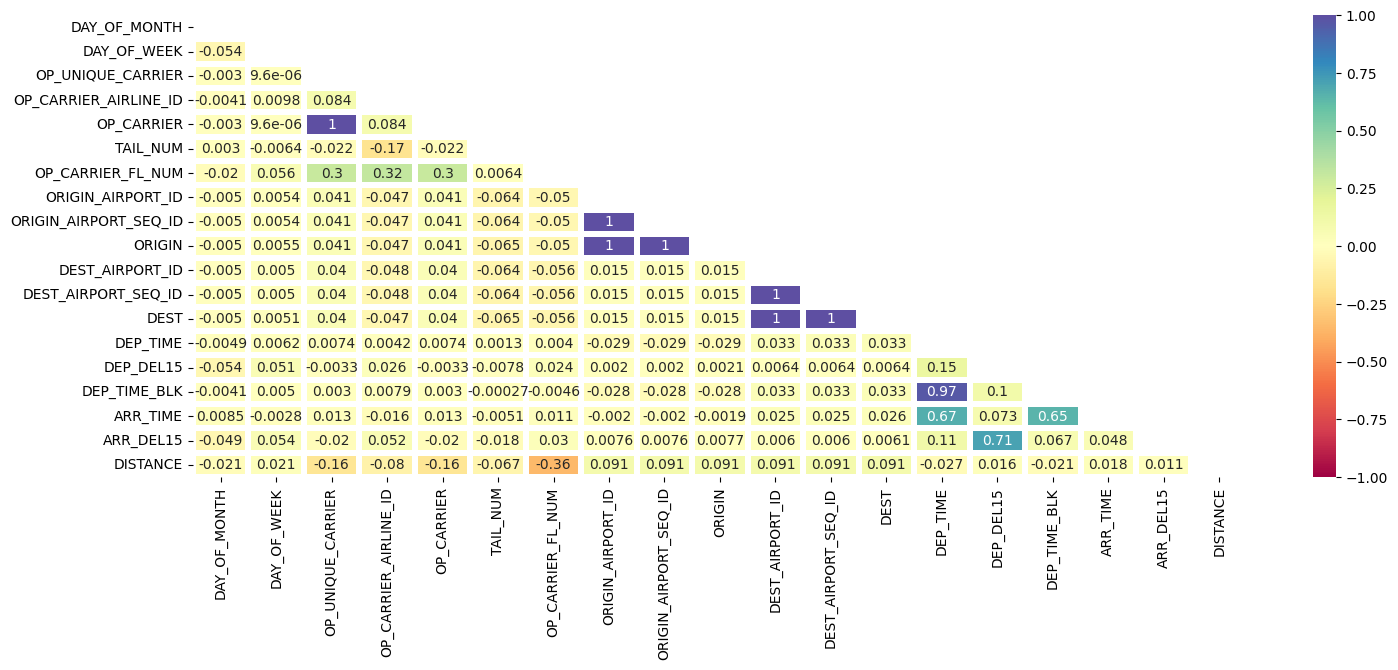

In [ ]:
plt.figure(figsize = (17, 6))
mask = np.triu(np.ones_like(df.corr(method = "pearson"), dtype=np.bool))
sns.heatmap(correlation_data,mask=mask, vmin=-1, vmax=1, annot=True, linewidths=4, cmap = 'Spectral')

After the application, we will defined a function which allowed to go through the features and choose the most correlated features in the dataset and shows that features are highly correlated.

In [ ]:
def correlation(df, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

7

In [ ]:
corr_features

{'ARR_DEL15',
 'DEP_TIME_BLK',
 'DEST',
 'DEST_AIRPORT_SEQ_ID',
 'OP_CARRIER',
 'ORIGIN',
 'ORIGIN_AIRPORT_SEQ_ID'}

We know that we have hight correlation betwen departure dellay and arrival delay so we will drop ARR_DEL15. However i will add it at the and of the dataframe as we defined it as a lable.

In [ ]:
df_new = df.drop(corr_features, axis=1)
df_new.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DEL15,ARR_TIME,DISTANCE
0,0,2,5,8,2118,4391,239,130,594,0,676,72
1,0,2,5,8,471,4395,335,238,618,0,735,438
2,0,2,5,8,208,4398,110,340,1120,0,1280,481
3,0,2,5,8,369,4399,50,156,1118,0,1204,138
4,0,2,5,8,2617,4401,279,156,629,0,809,928


### Label
We desided that the target variable for us is the flight delay "Arr_Del15".
We will have a look on the feature closer

In [ ]:
df_new["ARR_DEL15"] = df["ARR_DEL15"]
df_new

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DEL15,ARR_TIME,DISTANCE,ARR_DEL15
0,0,2,5,8,2118,4391,239,130,594,0,676,72,0
1,0,2,5,8,471,4395,335,238,618,0,735,438,0
2,0,2,5,8,208,4398,110,340,1120,0,1280,481,0
3,0,2,5,8,369,4399,50,156,1118,0,1204,138,0
4,0,2,5,8,2617,4401,279,156,629,0,809,928,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607341,30,4,0,7,1352,4806,341,95,593,1,687,312,1
607342,30,4,0,7,1163,4807,96,169,1059,0,1173,369,0
607343,30,4,0,7,1160,4808,136,189,345,0,471,461,0
607344,30,4,0,7,792,4809,18,346,1026,0,1091,442,0


In [ ]:
df_new.shape

(607346, 13)

After the application we could realize 7 features from the original dataset weren’t correlated enough to help on ML models for predictions.

Consequently, we dropped them ending up with 607346 rows × 13 columns afterward.

In [ ]:
df["ARR_DEL15"].unique()

array([0, 1])

<Axes: xlabel='ARR_DEL15', ylabel='count'>

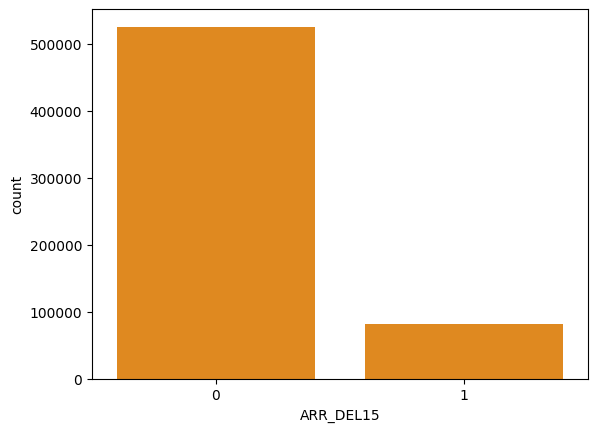

In [ ]:
sns.countplot(x = df["ARR_DEL15"], color = '#ff8c00')


**ExtraTreesClassifier**

The ExtraTrees algorithm is an ensemble machine learning technique that involves the training of multiple decision trees, followed by the aggregation of their results to produce a prediction. It employs the complete dataset for the purpose of training decision trees. In order to promote adequate dissimilarities among individual decision trees, a random selection process is employed to determine the values at which a feature is split and child nodes are generated. (Thankachan, 2022).

The utilisation of Extratreeclassifier can yield optimal features with respect to the target variable. The feature with the highest correlation score is deemed the most favourable and subsequently selected for further analysis. By utilising the data for both the x and y variables, it is possible to compute a score that indicates the significance of each feature. Through the process of organising these scores into a structured arrangement, it becomes feasible to observe the relative significance of each score in a progressively increasing manner. ( Grogan, 2021).


[0.04244838 0.02667231 0.0112843  0.01284157 0.06102015 0.05429382
 0.04756457 0.04715845 0.06958711 0.49190715 0.08074595 0.05447624]


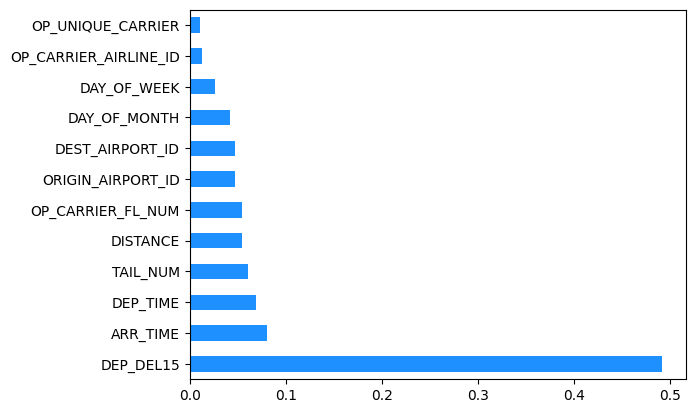

In [ ]:
X = df_new.iloc[:,0:12]  #independent columns
y = df_new.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh', color = "#1e90ff")
plt.show()


In [ ]:
print(feat_importances.nlargest(12))

DEP_DEL15                0.491907
ARR_TIME                 0.080746
DEP_TIME                 0.069587
TAIL_NUM                 0.061020
DISTANCE                 0.054476
OP_CARRIER_FL_NUM        0.054294
ORIGIN_AIRPORT_ID        0.047565
DEST_AIRPORT_ID          0.047158
DAY_OF_MONTH             0.042448
DAY_OF_WEEK              0.026672
OP_CARRIER_AIRLINE_ID    0.012842
OP_UNIQUE_CARRIER        0.011284
dtype: float64


Upon analysing the results in the table  it is evident that "DEP_DEL15" exhibits a superior score, followed by "ARR_TIME" and subsequent variables. It is evident that the variables "DAY_OF_WEEK", "OP_CARRIER_AIRLINE_", and "OP_UNIQUE_CARRIER" exhibit a lower degree of correlation. This information may help in the reduction of dimensionality by eliminating features that have a weaker correlation with the target variable. This can potentially enhance the accuracy of machine learning models in making predictions.

# Preparation for Machine Learning Models
## Splitting Data
Aiming the success of the machine learning models, the preparation for it was developed. Arrays were
designed and the independent and dependent variables were picked, as well as the Training and Test set up.

### Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaled_column = [""]#column to scale

### SMOTE
SMOTE (Synthetic Minority Oversampling Technique)
SMOTE is one of the techniques used to solve the problem with unbalanced classes.
It balances class distribution by randomly increasing minority class examples by replicating them. The algorithm randomly selects one or more of the k-nearest neighbours for each example in the minority class.

Machine Learning algorithms increase accuracy by reducing the error, they do not consider the class distribution. Some of the ML models are more likely only to predict the majority class, which leads to major misclassification of the minority class compared with the majority class.


The visualisation of the classes above shows that data is imbalanced. In this case, 0 class is the major and 1 is the minor.I will apply the technique in order to balance the classes.

SMOTE()
make_classification()
are used for normalizing classification

In [ ]:
# conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

In [ ]:
df_new_arrays =df_new.values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X = df_new_arrays[:,:12]  # Features
y = df_new_arrays[:,-1]  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 5) # 70% training and 30% test
print(X, y)

[[   0    2    5 ...    0  676   72]
 [   0    2    5 ...    0  735  438]
 [   0    2    5 ...    0 1280  481]
 ...
 [  30    4    0 ...    0  471  461]
 [  30    4    0 ...    0 1091  442]
 [  30    4    0 ...    0 1288  442]] [0 0 0 ... 0 0 0]


In [ ]:
y_train.unique()

AttributeError: ignored

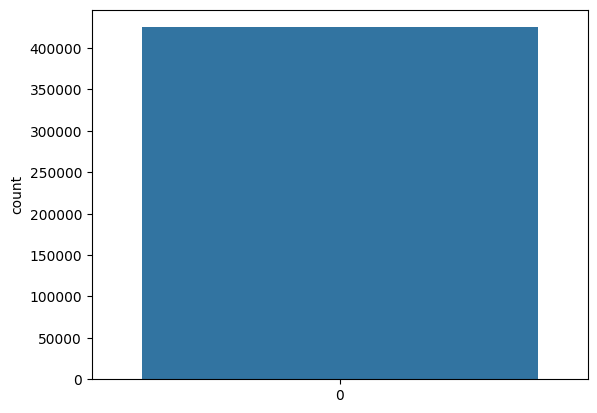

In [ ]:
sns.countplot(y_train);

In [ ]:
from sklearn.datasets import make_classification

sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X, y)


In [ ]:
# Print the number of samples in each class before and after SMOTE
print("Number of samples before SMOTE: ", len(y))
print("Number of samples after SMOTE: ", len(y_res))

Number of samples before SMOTE:  607346
Number of samples after SMOTE:  1050122


In [ ]:
X_train

array([[  13,    1,   14, ...,    0,  636,  862],
       [   3,    5,    1, ...,    0,  566, 1097],
       [  15,    3,   12, ...,    0,  977,  137],
       ...,
       [  27,    1,    4, ...,    0,  683,  264],
       [   1,    3,    9, ...,    0, 1295,  162],
       [  15,    3,    4, ...,    0,  600,  401]])

In [ ]:
#df_new_arrays['ARR_DEL15'].value_counts()

In [ ]:
# SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)

In [ ]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler

# Create an initialise an object sc by calling a method StandardScaler()
df_new_arrays = StandardScaler()

# Train the model by calling a method fit_transform
X_train = df_new_arrays.fit_transform(X_train)

# Store the transformed data into X_test
X_test = df_new_arrays.transform(X_test)

In [ ]:
np.bincount(y_train) #  method counts the occurrence of each element. Each bin value is the occurrence of its index

array([393795, 393795])

<Axes: ylabel='count'>

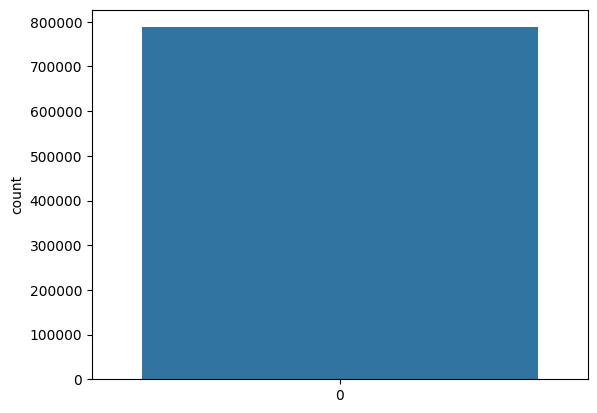

In [ ]:
sns.countplot(y_train)




# Cross-Validation

Cross_validation is statistical method to improve general performance of machine learning model. It makes the performance more stable than using traning and split set. Instead of splitting the data once, cross-validation repeatedly splitt the data and train multiple models. The commonly used approach is K-fold cross-validation. K usualy specified by users, and the number can be from 7 to 10. Firstly when we do cross-validation the data splits into parts what we set, approximately equl size. Next it is train the model. The model is trained using the first fold as the test. TThe model is built using the data in folds 5.

**Another benefit of cross-validation as compared to using a single split of the data is
that we use our data more effectively. When using train_test_split, we usually use
75% of the data for training and 25% of the data for evaluation. When using five-fold
cross-validation, in each iteration we can use four-fifths of the data (80%) to fit the
model. When using 10-fold cross-validation, we can use nine-tenths of the data
(90%) to fit the model. More data will usually result in more accurate models**

The image above illustrating an example of splitng the data into folds.


To operate this machine learning the cross-validation by the K Fold technique was picked up in order to
avoid overfitting. "As we know when a model is trained using all of the data in a single shot and gives the
best performance accuracy. To resist this k-fold cross-validation helps us to build the model as a generalized
one." (Analytics Vidhya, 2022)

Cross-validation is imported from in scikit-learn using the cross_val_score function from the model_selection module.
The parameters of the cross_val_score function are the model we want to evaluate, the training data, and the ground-truth
labels.

# Decision Tree and Cross Validation
The Decision Tree performed with an elevated accuracy of 93,24%.
Furthermore, we choose for plotting a heatmap combined with the confusion matrix once we are working
with a classification issue.
For the confusion matrix we have got :

● Confusion matrix:

 [[126129   5137]

 [  5227  15344]]

In other words, we have got high results of True
Positives and True Negatives, while False positives and
negatives are low. We can conclude our model
performed very well in predictions by the confusion
matrix.
Another index we took into consideration while evaluating our machine learning is Recall.
"Recall is defined as the ratio of the total number of correctly classified positive classes divide by the total
number of positive classes"(Suresh, 2020)
On our model, we have got 0.96 , really close to 1 which is ideal.

**Hyperparameters**

- kfolds
It is evaluation of the ML model peformens. It is more stable and thorough than using a split into a training and a test set. The most commonly used is Kfold validation. We will use diferent number of kfold.

- max_depth
The maximum depth of a binary tree is the number of nodes from the root that goes down to the furthest leaf of the node. It indicates hoe deep the disition tree can be. As deeper the tree as more information it could cuptue. It is important to find a good match as the model could be overfited.  It is one of the most important hyperparameters when it comes to increasing the accuracy of the model.

- Min_samples_leaf
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.

________________________________________________________________________________________________________________________

**GridSearchCV**

The aproach is evaluated for a range of hyperparameter values. This technique will construct many versions of the model with all possible combinations of hyperparameters and will return the best one.


I will set Hyperparameters in optimal range from 1 to 20. The techique will give me the croorect number of estimators.


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import GridSearchCV

Acuracy: 0.93

Cofusion matrix: 
 [[126129   5137]
 [  5227  15344]]

Classification Report:                precision    recall  f1-score   support

           0       0.96      0.96      0.96    131266
           1       0.75      0.75      0.75     20571

    accuracy                           0.93    151837
   macro avg       0.85      0.85      0.85    151837
weighted avg       0.93      0.93      0.93    151837



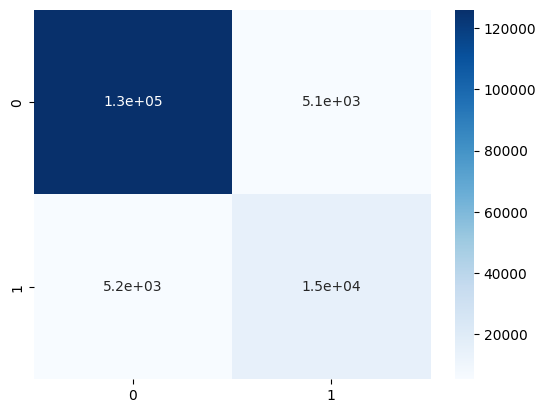

In [ ]:

DT = DecisionTreeClassifier(max_depth = 3, random_state = 0)# max deep for the performance is 3

kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)#cross-validation by Kfold technic

cvs_DT = cross_val_score(estimator = DT, X = X_train, y = y_train, cv = kfold, scoring='accuracy')

DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)
#confusion matrix
cm = confusion_matrix(y_test, y_pred_DT)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True, cmap='Blues')

Score = metrics.accuracy_score(y_test, y_pred_DT)
print('Acuracy: {:.2f}'.format(Score))
print()
print("Cofusion matrix: " '\n', confusion_matrix(y_test, y_pred_DT))
print()
print("Classification Report: ", classification_report(y_test, y_pred_DT))

In [ ]:
print("Cross validation score: ", cvs_DT)
print()
print("Average cross validation score : {:.2f}".format(cvs_DT.mean(), "\nStandard Deviation :", cvs_DT.std()))


Cross validation score:  [0.78266611 0.78420244 0.78348506 0.78465318 0.78294544]

Average cross validation score : 0.78




 Average cross validation score : 0.78

## GridSearch

In [ ]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [ ]:
depth = range(1, 20)
leaf = range(1, 20)

In [ ]:
grid = dict(max_depth=depth,min_samples_leaf=leaf)
grid_search = GridSearchCV(estimator=tree, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

NameError: ignored

In [ ]:
DT = DecisionTreeClassifier(max_depth = 3,'min_samples_leaf'= 1 random_state = 0)# max deep for the performance is 3

kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)#cross-validation by Kfold technic

cvs_DT = cross_val_score(estimator = DT, X = X_train, y = y_train, cv = kfold, scoring='accuracy')

DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)
#confusion matrix
cm = confusion_matrix(y_test, y_pred_DT)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True, cmap='Blues')

Score = metrics.accuracy_score(y_test, y_pred_DT)
print('Acuracy: {:.2f}'.format(Score))
print()
print("Cofusion matrix: " '\n', confusion_matrix(y_test, y_pred_DT))
print()
print("Classification Report: ", classification_report(y_test, y_pred_DT))

SyntaxError: ignored

GridSearch show that by using the best parameters, we can have a better result on the Test Score but still same results on Train score. Using Gridsearch to find the best parameters is a great way to improve , tune our model. According to the results, best parameters for this model are :'max_depth': 1, 'min_samples_leaf': 1

# Random Forest and Cross Validation

This Machine Learning model was picked to work on the data set as is the ideal one for classification
matters.
Random Forest "consists of a large number of individual decision trees that operate as an ensemble. Each
individual tree in the random forest spits out a class prediction and the class with the most votes becomes
our model’s prediction"(Yiu, 2021)




Accuracy: 0.93

Cofusion matrix: 
 [[126129   5137]
 [  5227  15344]]

Classification Report:                precision    recall  f1-score   support

           0       0.96      0.96      0.96    131266
           1       0.75      0.75      0.75     20571

    accuracy                           0.93    151837
   macro avg       0.85      0.85      0.85    151837
weighted avg       0.93      0.93      0.93    151837



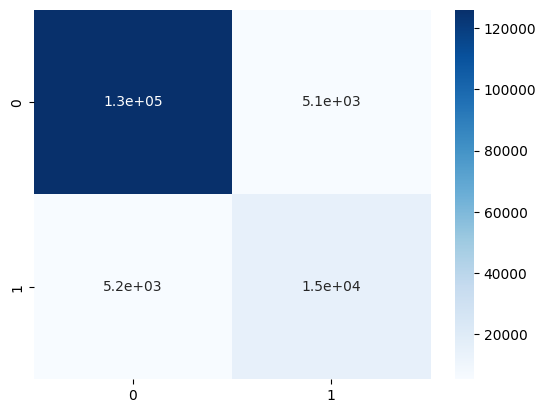

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

mdl = None

kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

mdl = RandomForestClassifier(random_state=0, n_estimators=5, max_depth=3)
mdl.fit( X_train, y_train)

rf_cval_score = cross_val_score(mdl, X_train, y_train, cv = kfold, scoring='accuracy')

mdl_RF_predicted = mdl.predict(X_test)
from sklearn import metrics


cm = confusion_matrix(y_test, mdl_RF_predicted)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True, cmap='Blues')
print("Accuracy: {:.2f}".format(Score))
print()
print("Cofusion matrix: " '\n', confusion_matrix(y_test, mdl_RF_predicted))
print()
Score = metrics.accuracy_score(y_test, mdl_RF_predicted)
print("Classification Report: ", classification_report(y_test, mdl_RF_predicted))


In [ ]:
print("Cross validation score: ", rf_cval_score)
print()
print("Average cross validation score : {:.2f}".format(rf_cval_score.mean()), "\nStandard Deviation :", rf_cval_score.std())



Cross validation score:  [0.78268515 0.78421514 0.7835295  0.78467858 0.78294544]

Average cross validation score : 0.78 
Standard Deviation : 0.000749867117086996


The algorithm was performed and once again, as performance indicators, on the outcomes we got:
● Accuracy of the model: 93%
● Recall: 0.96
● Confusion matrix :

 [[126129   5137]

 [  5227  15344]]

Which demonstrates elevated accuracy once
we got high results on the True positives
and True falses on the matrix.

# Logistic Regression and Cross Validation

Logistic Regression intends to predict the values of the dependent variable by the independent variables
used.
As is upon multi-class classification problem, the ROC (Receiver Operating Characteristics) curve was used to
evaluate the performance of the Logistic Regression and it will tell us "how much the model is capable of
distinguishing between classes"(Narkhede, 2021). A

Accuracy: 0.93

Cofusion matrix: 
 [[125980   5286]
 [  5217  15354]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    131266
           1       0.74      0.75      0.75     20571

    accuracy                           0.93    151837
   macro avg       0.85      0.85      0.85    151837
weighted avg       0.93      0.93      0.93    151837



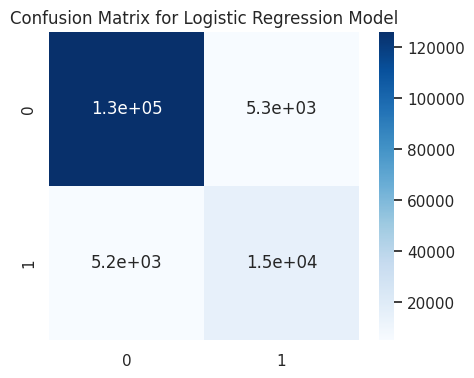

In [ ]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression(solver='liblinear', multi_class='ovr')
LG.fit(X_train, y_train)

cvs_LG = cross_val_score(LG, X_train, y_train, cv=kfold, scoring='accuracy')

y_predictLG = LG.predict(X_test)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predictLG)

# Create a Seaborn heatmap plot for the confusion matrix
ax = sns.heatmap(cm, annot=True, cmap='Blues')

# Set the title of the plot
ax.set_title("Confusion Matrix for Logistic Regression Model")
print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_predictLG)))
print()
print("Cofusion matrix: " '\n', confusion_matrix(y_test, y_predictLG))
print()
print("Classification Report: ")
print(classification_report(y_test, y_predictLG))

In [ ]:
print("Cross validation score: ", cvs_LG)
print()
print("Average cross validation score : {:.2f}".format(cvs_LG.mean()), "\nStandard Deviation :", cvs_LG.std())



Cross validation score:  [0.78225981 0.78379614 0.78305971 0.78417705 0.78255184]

Average cross validation score : 0.78 
Standard Deviation : 0.0007251110165471769


As well as cross-validation and confusion matrix was
used to evaluate the accuracy of the model.
On the outcomes we got:
● Accuracy of the model: 93%
● Recall: 0.96
● Confusion matrix :
    
Cofusion matrix:

 [[126014   5252]

 [  5218  15353]]

Elevated accuracy by analyzing the result
from the True Positives and True Falses.

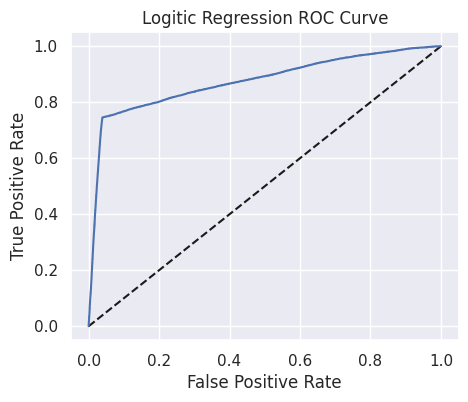

In [ ]:
from sklearn.metrics import roc_curve
sns.set(rc={'figure.figsize':(5,4)})
y_pred_prob = LG.predict_proba(X_test)[:,1]
fpr, tpr,thresholds = roc_curve(y_test,y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logitic Regression ROC Curve')
plt.show()

● ROC curve: The curve indicates an accuracy of roughly 76%.


Overall matter, all machine learning models got satisfactory outcomes, which means we performed with high
accuracy the predictions.


# Grid Search for Logistic Regression

Grid Search is “ a process that searches exhaustively through a manually specified subset of the hyperparameter space of the targeted algorithm.” (www.sciencedirect.com, n.d.). We applied the model in order to try to get better results on the Logistic Regression.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
logModel = LogisticRegression()

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000],
    'multi_class': ['ovr', 'multinomial']
    }
]

In [ ]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X_train, y_train)

In [ ]:
best_clf.best_estimator_

In [ ]:
print (f'Accuracy - : {best_clf.score(X_train, y_train):.3f}')

## Running the Logistic Regression with new hyperparameters

### According to the best fit from Grid Search

The Grid Search was applied and as an outcome, we got the following hyperparameters :
- solver='liblinear'
- penalty = 'l1'
- C=0.0001

Where we have them break down :


- solver: This parameter specifies the algorithm to use in the optimization problem that arises during training. In this case, solver='liblinear' indicates that the optimization algorithm used is the Liblinear solver, which is recommended for small datasets.

- penalty: This parameter specifies the type of regularization to apply to the logistic regression model. In this case, penalty='l1' indicates that L1 regularization (also known as Lasso regularization) is used. L1 regularization encourages the model to select a sparse set of features by adding a penalty term proportional to the absolute value of the weights. Other penalty options include ‘l2’ for Ridge regularization and ‘elasticnet’ for a combination of L1 and L2 regularization.

- C: This parameter controls the strength of the regularization term in the logistic regression model. In this case, C=0.0001 indicates a very high regularization strength, meaning that the model will be heavily penalized for large weights.


Accuracy: 0.93

Cofusion matrix: 
 [[126129   5137]
 [  5227  15344]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    131266
           1       0.75      0.75      0.75     20571

    accuracy                           0.93    151837
   macro avg       0.85      0.85      0.85    151837
weighted avg       0.93      0.93      0.93    151837



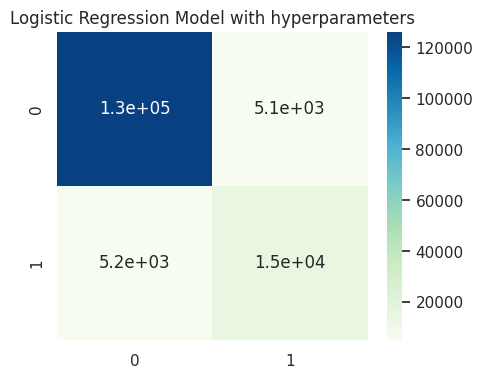

In [ ]:
### New parameters for the model

LG = LogisticRegression(solver='liblinear', penalty = 'l1', C=0.0001)
LG.fit(X_train, y_train)

cvs_LG = cross_val_score(LG, X_train, y_train, cv=kfold, scoring='accuracy')

y_predictLG = LG.predict(X_test)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predictLG)

# Create a Seaborn heatmap plot for the confusion matrix
ax = sns.heatmap(cm, annot=True, cmap='GnBu')

# Set the title of the plot
ax.set_title("Logistic Regression Model with hyperparameters")

print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_predictLG)))
print()
print("Cofusion matrix: " '\n', confusion_matrix(y_test, y_predictLG))
print()
print("Classification Report: ")
print(classification_report(y_test, y_predictLG))

In [ ]:
print("Cross validation score: ", cvs_LG)
print()
print("Average cross validation score : {:.2f}".format(cvs_LG.mean()), "\nStandard Deviation :", cvs_LG.std())


Cross validation score:  [0.78175193 0.78358029 0.78260262 0.78581495 0.7822979  0.78467223
 0.78481189 0.78448177 0.7835422  0.78234868]

Average cross validation score : 0.78 
Standard Deviation : 0.001263967064229297


### Other Machine Learning performed
We also built other machine learning models, such as Support Vector Machine and GaussianNB, but over the
course we decided to take into consideration only the machine learning models described above, the ones
we have a solid understanding of and we managed to get high-performance indicators.


In [ ]:
from tabulate import tabulate

table = [["Decision Tree and Cross Validation", "0.0", "0.0","0.0"],
         ["Random Forest and Cross Validation", "0.0", "0.0","0.0"],
         ["Logistic Regression and Cross Validation", "0", "0.0","0.0"]]

headers = ["Models", "Accuracy", "Recall","Cross Validation Score",]

print(tabulate(table, headers, tablefmt="fancy_grid"))

╒══════════════════════════════════════════╤════════════╤══════════╤══════════════════════════╕
│ Models                                   │   Accuracy │   Recall │   Cross Validation Score │
╞══════════════════════════════════════════╪════════════╪══════════╪══════════════════════════╡
│ Decision Tree and Cross Validation       │          0 │        0 │                        0 │
├──────────────────────────────────────────┼────────────┼──────────┼──────────────────────────┤
│ Random Forest and Cross Validation       │          0 │        0 │                        0 │
├──────────────────────────────────────────┼────────────┼──────────┼──────────────────────────┤
│ Logistic Regression and Cross Validation │          0 │        0 │                        0 │
╘══════════════════════════════════════════╧════════════╧══════════╧══════════════════════════╛


# Conclusion

From the above research, it can be concluded that the prediction of the delay of the flights has been evaluated for the benefit of the people to enhance the growth of the business of the airport industry. The aim of the project is to automate analytical model building and enable computers to learn from data without being explicitly programmed to do so. The machine learning algorithm in the jupyter notebook software evaluates the departure and delay time of the flights. We balance the data and applied additional techniques in order to have the best result in ML model performance. It is important point in the evaluation to balance the data. The main reason for this is to give equal priority to each class.

The extreme matrix brings unique parameters for the data we have. We chose Random Forest and Cross-Validation to work on the data set as it is the ideal one for classification matters, this model gave us a 93% accuracy and a cross-validation score gives 78%, which demonstrates elevated accuracy once we got high results on the True positives and True falses on the matrix.
Thereafter, the multi-linear model has been given 93% accuracy and cross-validation score gives 78%, which projects that the delay and departure time can be evaluated for the future from the given dataset for the airports. False positives and false negatives carry serious implications for air travel when a false positive happens. The Decision tree model has shown the highest accuracy score among the other machine learning models. We can conclude our model performed very well in predictions by the confusion matrix.  In this scenario, we pay attention to metrics such as recall as it lower false negative values.  The models can be applied for further predictions of the flight delay as it provides high result in terms of cross-validation and recognising TP and TN values.

_____________________________________________________________________________________________________